In [6]:
import os
import sys

project_dir = os.path.abspath('..')
sys.path.append(project_dir)

In [7]:
import logging
import torch
from src import utils, data

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

logger = utils.Logger(name='image_colorizer', level=logging.INFO, log_directory='../logs', log_file='log_file.log').get_logger()

input_filepath = '../data'
split_proportions = (0.7, 0.2, 0.1)
image_size = (256, 256)
logger = logger
class_list = ['n00006484', 'n00007846', 'n00440382', 'n00445055', 'n00447540']
images_per_class = 5
multiprocessing_workers = 5
batch_size = 10
loss_function = utils.LossFunction()

loader = data.Loader(input_filepath=input_filepath, split_proportions=split_proportions, image_size=image_size,
                        logger=logger, class_list=class_list, images_per_class=images_per_class,
                        multiprocessing_workers=multiprocessing_workers, batch_size=batch_size, loss_function=loss_function)
loader.clear_directories()
loader.setup_paths()
loader.load_and_split_data()
loader.setup_data_loaders()

2024-06-19 09:46:04,712 - INFO - image_colorizer - Cleared and reset directory
2024-06-19 09:46:04,719 - INFO - image_colorizer - Directories set up for original, lab, and gray images.
2024-06-19 09:46:04,720 - INFO - image_colorizer - Downloading images.


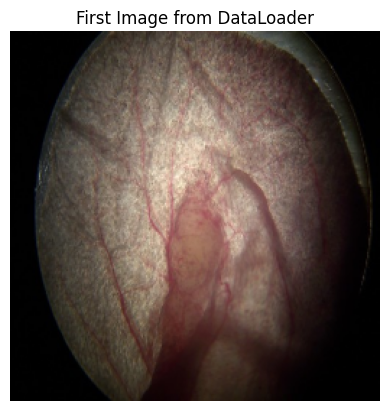

In [3]:
loader.display_first_image(loader.test_original_data_loader)

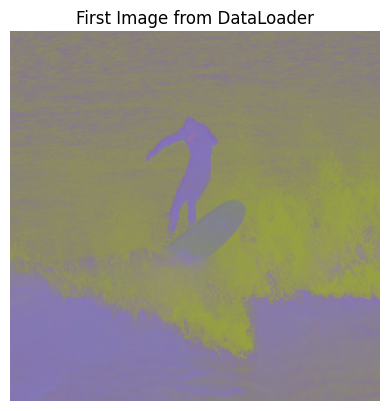

In [4]:
loader.display_first_image(loader.test_lab_data_loader)

In [ ]:
from torch import optim
from src import models

epochs = 15
    
model = models.Model()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
manager = models.Manager(model, loader, logger, device)
manager.train_model(loss_function, optimizer, epochs)